In [ ]:

import requests

from dataclasses import dataclass

import json


In [ ]:
url = 'https://data.wprdc.org/api/3/action/datastore_search?resource_id=1c59b26a-1684-4bfb-92f7-205b947530cf&limit=10000' 


fileobj = requests.get(url)


In [ ]:
jayson = fileobj.json()
json_li = jayson['result']['records']


In [ ]:
field_li = [jayson['result']['fields'][i]['id'] for i in range(len(jayson['result']['fields']))]

In [ ]:
field_li

In [ ]:
print(json_li[0])

In [ ]:
result_string = json.dumps(json_li)
with open('overdose_data.json', 'w') as outfile:
    outfile.write(result_string)

In [1]:

import requests

from dataclasses import dataclass

import json

from collections import Counter

In [2]:
class HashableList(list):
    #list of lists is not hashable by counter, create custom data type
    def __init__(self, val):
        #init function sorts input list upon initialization
        self.val = sorted(val)
    
    def __hash__(self):
        #make hashable
        return(hash(str(self.val)))

    def __repr__(self):
        #get clean output
        return str(self.val)

    def __eq__(self, other):
        #equality checking func
        return str(self.val) == str(other.val)
    
    def __len__(self):
        #length function
        return len(self.val)
    
    def __getitem__(self, index):
        #retrieve list elem by index
        return self.val[index]

In [3]:
@dataclass
class Overdose:
    
    overdose_dict: dict

    def __post_init__(self):
        self._id = self.overdose_dict['_id']
        self.death_date_and_time = self.overdose_dict['death_date_and_time']
        self.manner_of_death = self.overdose_dict['manner_of_death']
        self.age = self.overdose_dict['age']
        self.sex = self.overdose_dict['sex']
        self.race = self.overdose_dict['race']
        self.case_dispo = self.overdose_dict['case_dispo']
        
        all_ods = [self.overdose_dict['combined_od1'],
            self.overdose_dict['combined_od2'],
            self.overdose_dict['combined_od3'],
            self.overdose_dict['combined_od4'],
            self.overdose_dict['combined_od5'],
            self.overdose_dict['combined_od6'],
            self.overdose_dict['combined_od7'],
            self.overdose_dict['combined_od8'],
            self.overdose_dict['combined_od9'],
            self.overdose_dict['combined_od10']]
        
        self.drug_list = HashableList([i for i in all_ods if i is not None])

        self.incident_zip = self.overdose_dict['incident_zip']
        self.decedent_zip = self.overdose_dict['decedent_zip']
        self.case_time = self.overdose_dict['case_year']

In [28]:
def convert_tuple_li_to_dict(tuple_li):
    d = {}
    for i in tuple_li:
        d[i[0]] = i[1]
    return d

In [29]:
with open('overdose_data.json', 'r') as f:
  data = json.load(f)

In [30]:
od_list = []
for dict in data:
    od_list.append(Overdose(dict))

In [31]:
single_drug_li = [i.drug_list[0] for i in od_list if len(i.drug_list)==1]
single_drug_tuple_li = (Counter(single_drug_li).most_common(10))

In [32]:
multiple_drug_li = [i.drug_list for i in od_list if len(i.drug_list)>1]
multiple_drug_tuple_li = Counter(multiple_drug_li).most_common(10)

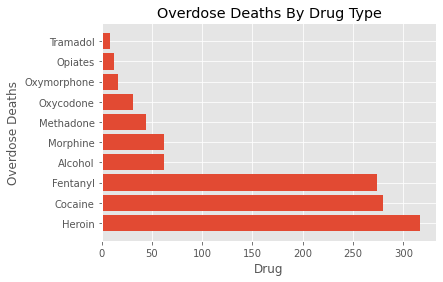

In [53]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = [i[0] for i in single_drug_tuple_li]
y = [i[1] for i in single_drug_tuple_li]

plt.barh(x, y)

plt.xlabel("Drug")
plt.ylabel("Overdose Deaths")
plt.title("Overdose Deaths By Drug Type")

plt.show()
